#Evidencia 2- Fase 3 LLM
Equipo 6:<br>
Ingrid García Hernández, A01754475<br>
Abigail Donají Chavez Rubio, A01747423<br>
Noh Ah Kim Kwon, A01747512<br>
Eduardo Alfredo Ramírez Muñoz, A01754917

In [ ]:
from transformers import pipeline

In [ ]:
# Librerías
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import LabelBinarizer

# Cargar dataset
from google.colab import drive
drive.mount('/content/drive')
ruta = '/content/data_test_fold2 - anorexia(in).csv'

df = pd.read_csv(ruta)

clase = df.iloc[:, 3]
clases = clase[:250]

tweets = df.tweet_text
tweets = tweets [:250] #Texto


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from transformers import pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


In [ ]:
classifier = pipeline("zero-shot-classification", model="joeddav/xlm-roberta-large-xnli")

prob_anorexia = []

for tweet in tweets:
  result = classifier(tweet, candidate_labels=["anorexia", "control"])
  prob = dict(zip(result['labels'], result['scores']))["anorexia"]
  prob_anorexia.append(prob)

labels_pred = ['anorexia' if p >= 0.5 else 'control' for p in prob_anorexia]



Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Matriz de confusión:
 [[ 39  95]
 [  8 108]]


In [ ]:
# Librerías
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Obtener la confusión de matriz
from sklearn.metrics import confusion_matrix


Matriz de confusión:
[[108   8]
 [ 95  39]]


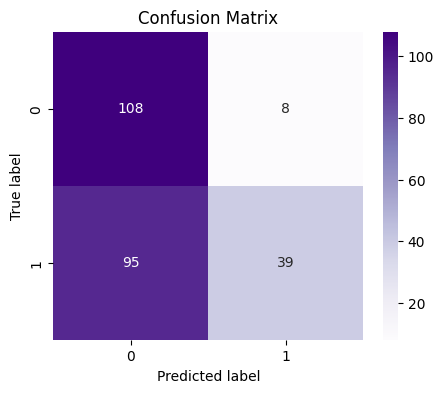

Accuracy: 0.588
Precision: 0.8297872340425532
Recall: 0.291044776119403
AUC: 0.6110396294390119


In [ ]:
y_true = df['class'].map({'control': 0, 'anorexia': 1})
#y_pred = df['pred_clase'].map({'control': 0, 'anorexia': 1})
# Convert labels_pred to numerical labels (0 for control, 1 for anorexia)
labels_pred_numeric = [1 if label == 'anorexia' else 0 for label in labels_pred]

cm = confusion_matrix(y_true[:250], labels_pred_numeric, labels=[0, 1])
print("\nMatriz de confusión:")
print(cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(clases, labels_pred))
print("Precision:",metrics.precision_score(clases, labels_pred, pos_label='anorexia'))
print("Recall:",metrics.recall_score(clases, labels_pred, pos_label='anorexia'))

# Se convierten las etiquetas en valores binarios
y_true_bin = [1 if label == 'anorexia' else 0 for label in clases]
y_pred_bin = [1 if label == 'anorexia' else 0 for label in labels_pred]
# Cálculo de AUC
auc = roc_auc_score(y_true_bin, y_pred_bin)
print("AUC:", auc)

AUC-ROC: 0.6762738033968091


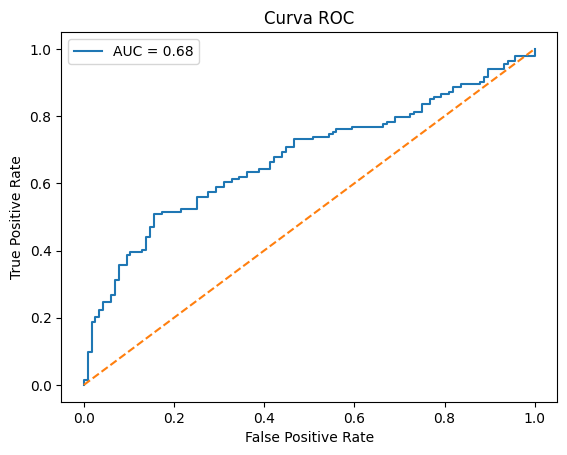

In [ ]:
from transformers import pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_true_bin, prob_anorexia)
print("AUC-ROC:", auc)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_true_bin, prob_anorexia)

# Graficar ROC
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()